In [1]:
import numpy as np
from scipy.optimize import brentq
from scipy.optimize import bisect
from scipy.interpolate import Rbf
import matplotlib.pyplot as plt
global th
th=2.5

global d
d=0.7

global tol
tol=1.0*(10**-4)

In [2]:
def system(n_1t_init, n_2t_init, h):
    global th
    global d
    h_f=h
    n_1t=n_1t_init
    n_2t=n_2t_init
    n_1t_new=0
    n_2t_new=0
    if n_1t<=1/2 and n_2t<= 1/2:
        n_1t_new= d * (th/2 + (1-th)*n_1t)
        n_2t_new= d * (th/2 + (1-th)*n_2t)
    
        
    elif n_1t>=(h_f(n_2t)) and n_2t>=(h_f(n_1t)):
        n_1t_new= d *n_1t
        n_2t_new= d* n_2t
        
            
        
    elif n_1t>=1/2 and n_2t<=(h_f(n_1)):
        n_1t_new=d*n_1t
        n_2t_new=d*(th*(h_f(n_1t)) + (1-th)* n_2t)
        
    elif n_1t<=(h_f(n_2t)) and n_2t>=1/2:
        n_1t_new= d*(th*(h_f(n_2t)) + (1-th)* n_1t)
        n_2t_new=d*n_2t
            
    return n_1t_new, n_2t_new
    

In [3]:
def h(n,r):
    def h_implicit(h):
        return ( h + n * (1/r))+(h+r*n)-2*(h+r*n)* ( h + n * (1/r)) 
    return brentq(h_implicit, 0.0, 1.0)
              

/home/tim/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:4: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


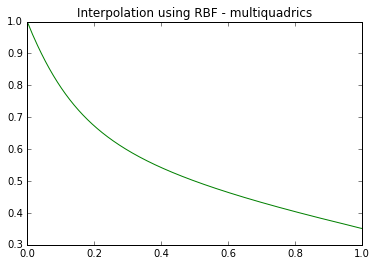

<function __main__.h_inter>

In [4]:
%matplotlib inline
def h_inter(r):
    x=np.linspace(1.0*(10**-100),1.0,100)
    y = np.empty([100,1.0])
    n_grid = np.linspace(1.0*(10**-100),1,100)
    for n in range(0,100):
        y[n] = h(n_grid[n],r)
    
   
    
    
    
    xi = np.linspace(0.0, 1.0, 1000)
    rbf=Rbf(x,y)
    fi=rbf(xi)
    
    
    plt.plot(xi, fi, 'g')
    plt.title('Interpolation using RBF - multiquadrics')
    plt.show()
    return h_inter
h_inter(0.2)

In [5]:
def norm(n_1t, n_2t,n_1t_new_2, n_2t_new_2):
    n_1=np.array((n_1t, n_2t))
    n_2=np.array((n_1t_new_2, n_2t_new_2))
    return (np.amax(np.abs(n_1-n_2)))

In [6]:
def synchronize_2(n_1t_init, n_2t_init, r):
    h=h_inter(r)
    n_1t=n_1t_init
    n_2t=n_2t_init
    n_1t_new=0
    n_2t_new=0
    n_1t_new_2=0
    n_2t_new_2=0
    max_iter=200
    time=0
    
    for i in range(0,max_iter):
        
        if i>0 and norm(n_1t, n_2t, n_1t_new_2, n_2t_new_2)<=tol:
           
            break
        elif i>=0 and norm(n_1t, n_2t, n_1t_new_2, n_2t_new_2)>tol:
            n_1t=n_1t_new
            n_2t=n_2t_new
            n_1t_new, n_2t_new=system(n_1t, n_2t,h)   
            n_1t_new_2, n_2t_new_2=system(n_1t_new, n_2t_new,h)
            time+=1
        elif i==max_iter-1:
            time=0
        
        
          
    return i

/home/tim/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:4: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


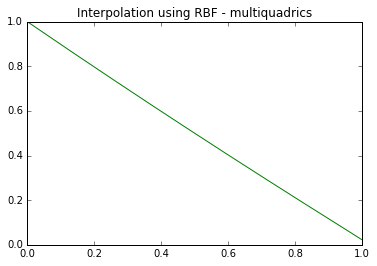

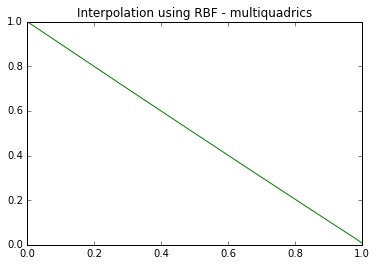

TypeError: unorderable types: float() >= function()

In [7]:
synchronize_2(0.2,0.5,0.8)

In [8]:
def t():
    
    x=0.2
    y=0.5
    x_2=0
    y_1=0
    x_3=0
    y_3=0
    for i in range(0,15):
        n_1t=n_1t_new
        n_2t=n_2t_new
        n_1t_new, n_2t_new=system(n_1t, n_2t,r)   
        n_1t_new_2, n_2t_new_2=system(n_1t_new, n_2t_new,r)
    return x,y

In [ ]:
x():
    return h_inter(.2)